# Load image and generate landmarks

In [1]:
import os
import math
import numpy as np
import face_recognition


LABELS = ['22q11','Angelman','Apert','CDL','Down','FragileX','Marfan','Progeria','Sotos','TreacherCollins','Turner','Williams']


def load_dataset(setPath):
    X = []
    y = []

    for label in LABELS:
        directory = os.path.join(setPath,label)
        for f in os.listdir(directory):
            path = os.path.join(directory,f)
            
            if os.path.isfile(path) and f != 'desktop.ini':
                
                # Extract landmarks
                image = face_recognition.load_image_file(path)
                face_locations = face_recognition.face_locations(image)
                face_landmarks_list = face_recognition.face_landmarks(image)

                # Iterate through detected faces
                keypoints = []
                for i in range(0,len(face_landmarks_list)):
                    (top,right,bottom,left) = face_locations[i]
                    landmarks = face_landmarks_list[i]
                    
                    height = (bottom - top)
                    width = (right - left)
                    
                    cY = top + height/2.0
                    cX = left + width/2.0
                    
                    # Center and append to points list
                    first = True
                    transform = None
                    points = []
                    for featureType in landmarks.keys():
                        for point in landmarks[featureType]:
                            
                            if first: # convert first point distance to be 1
                                first = False
                                transform = 1.0 / math.sqrt((point[0] - cY)**2 + (point[1] - cX)**2)
                            
                            rectifiedPoint = [(point[0]- cY) / transform,(point[1] - cX) / transform]
                            
                            points = points + rectifiedPoint
    
                    # Store result
                    keypoints.append(points)

                # Append to dataset
                for facePoints in keypoints:
                    X.append(facePoints)
                    y.append(label)
    
    return np.array(X), np.array(y)

In [2]:
X_test, y_test = load_dataset('./data/raw/Test')
print(X_test.shape)
print(y_test.shape)

(312, 144)
(312,)


In [3]:
X_train, y_train = load_dataset('./data/raw/Train')
print(X_train.shape)
print(y_train.shape)

(1023, 144)
(1023,)


## SVM Approach

In [4]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-0.00180121  0.00020478 -0.00145854 ... -0.00046    -0.00039503
   0.00136359]
 [ 0.0032865  -0.0018114  -0.00624242 ... -0.00731118  0.00406841
  -0.0008509 ]
 [-0.00507331  0.00243582 -0.0021989  ... -0.00431204  0.00047811
  -0.00479425]
 ...
 [ 0.00217365 -0.00321037 -0.00187862 ... -0.00506879 -0.00146064
   0.00079265]
 [ 0.00165298  0.0058337   0.00128671 ... -0.00476309  0.0016526
  -0.00114428]
 [-0.00303639 -0.00798161  0.00032962 ...  0.00071084 -0.00071636
  -0.00474815]]
[-7.51356340e-05 -4.24482368e-03 -1.24999328e-03 -3.07076915e-03
 -3.37396155e-03  1.08687223e-03 -2.28912539e-04 -1.53287043e-03
 -5.45991530e-04 -1.37777088e-03 -1.30960979e-04 -1.43059672e-03]


/home/curt/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.6500488758553274


Text(69.0, 0.5, 'Actual')

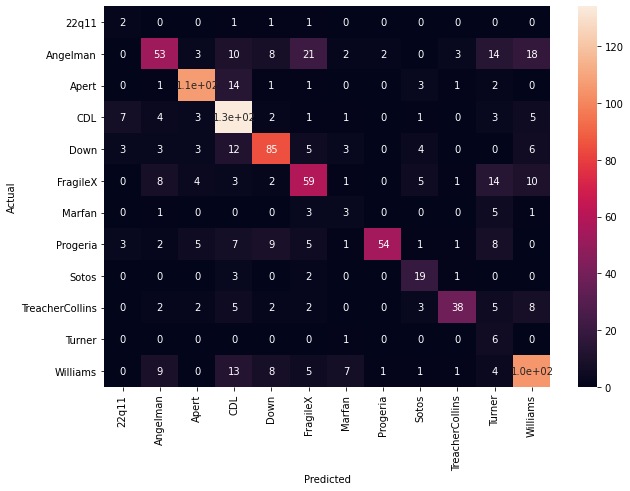

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.5192307692307693


Text(69.0, 0.5, 'Actual')

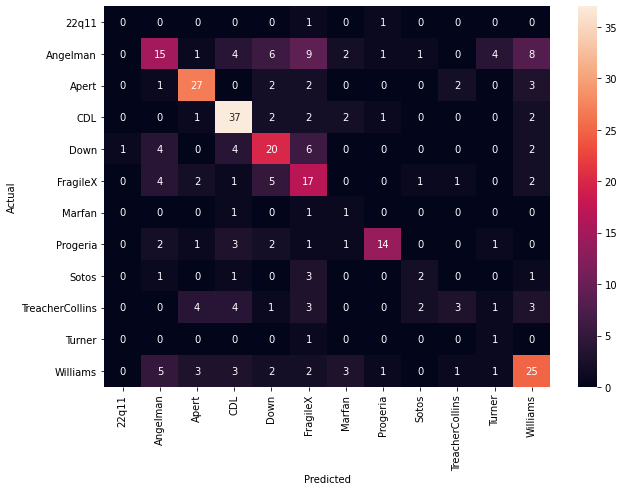

In [8]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Neural Network Approach

In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 50), max_iter=2000, verbose=True, n_iter_no_change=500)
clf.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

Iteration 289, loss = 2.24642311
Iteration 290, loss = 2.24594320
Iteration 291, loss = 2.24544288
Iteration 292, loss = 2.24496130
Iteration 293, loss = 2.24449320
Iteration 294, loss = 2.24401681
Iteration 295, loss = 2.24356418
Iteration 296, loss = 2.24310220
Iteration 297, loss = 2.24266016
Iteration 298, loss = 2.24223417
Iteration 299, loss = 2.24183592
Iteration 300, loss = 2.24140127
Iteration 301, loss = 2.24101133
Iteration 302, loss = 2.24060977
Iteration 303, loss = 2.24019751
Iteration 304, loss = 2.23978748
Iteration 305, loss = 2.23935539
Iteration 306, loss = 2.23896681
Iteration 307, loss = 2.23855462
Iteration 308, loss = 2.23817204
Iteration 309, loss = 2.23776949
Iteration 310, loss = 2.23742612
Iteration 311, loss = 2.23706494
Iteration 312, loss = 2.23675205
Iteration 313, loss = 2.23641082
Iteration 314, loss = 2.23606729
Iteration 315, loss = 2.23571443
Iteration 316, loss = 2.23538762
Iteration 317, loss = 2.23502211
Iteration 318, loss = 2.23464606
Iteration 

Iteration 550, loss = 2.20074491
Iteration 551, loss = 2.20070921
Iteration 552, loss = 2.20065429
Iteration 553, loss = 2.20063242
Iteration 554, loss = 2.20059249
Iteration 555, loss = 2.20054127
Iteration 556, loss = 2.20050611
Iteration 557, loss = 2.20045954
Iteration 558, loss = 2.20040909
Iteration 559, loss = 2.20035943
Iteration 560, loss = 2.20030316
Iteration 561, loss = 2.20025809
Iteration 562, loss = 2.20020118
Iteration 563, loss = 2.20016581
Iteration 564, loss = 2.20013579
Iteration 565, loss = 2.20009384
Iteration 566, loss = 2.20005497
Iteration 567, loss = 2.20001431
Iteration 568, loss = 2.19998273
Iteration 569, loss = 2.19994715
Iteration 570, loss = 2.19988127
Iteration 571, loss = 2.19985214
Iteration 572, loss = 2.19980030
Iteration 573, loss = 2.19975867
Iteration 574, loss = 2.19971514
Iteration 575, loss = 2.19966422
Iteration 576, loss = 2.19962481
Iteration 577, loss = 2.19955657
Iteration 578, loss = 2.19950807
Iteration 579, loss = 2.19946631
Iteration 

Iteration 810, loss = 2.19520065
Iteration 811, loss = 2.19519499
Iteration 812, loss = 2.19518281
Iteration 813, loss = 2.19517402
Iteration 814, loss = 2.19515428
Iteration 815, loss = 2.19515834
Iteration 816, loss = 2.19514667
Iteration 817, loss = 2.19513001
Iteration 818, loss = 2.19511248
Iteration 819, loss = 2.19511799
Iteration 820, loss = 2.19512307
Iteration 821, loss = 2.19510298
Iteration 822, loss = 2.19510564
Iteration 823, loss = 2.19510258
Iteration 824, loss = 2.19511204
Iteration 825, loss = 2.19508291
Iteration 826, loss = 2.19508832
Iteration 827, loss = 2.19507695
Iteration 828, loss = 2.19505710
Iteration 829, loss = 2.19505379
Iteration 830, loss = 2.19505376
Iteration 831, loss = 2.19502910
Iteration 832, loss = 2.19502107
Iteration 833, loss = 2.19500665
Iteration 834, loss = 2.19500537
Iteration 835, loss = 2.19498646
Iteration 836, loss = 2.19501875
Iteration 837, loss = 2.19501742
Iteration 838, loss = 2.19499886
Iteration 839, loss = 2.19501226
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.15835777126099707


Text(69.0, 0.5, 'Actual')

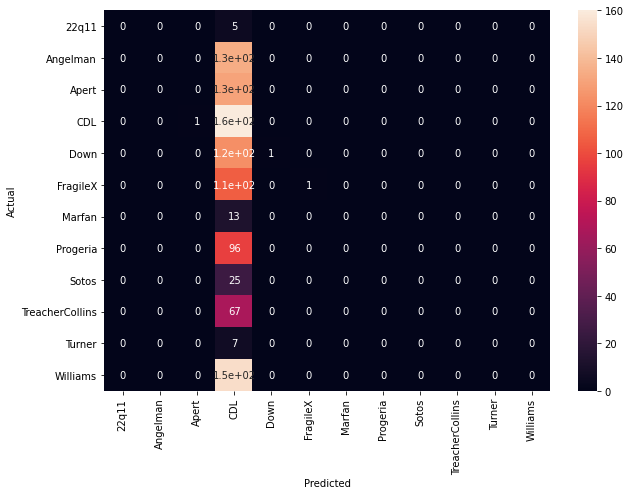

In [11]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.15384615384615385


Text(69.0, 0.5, 'Actual')

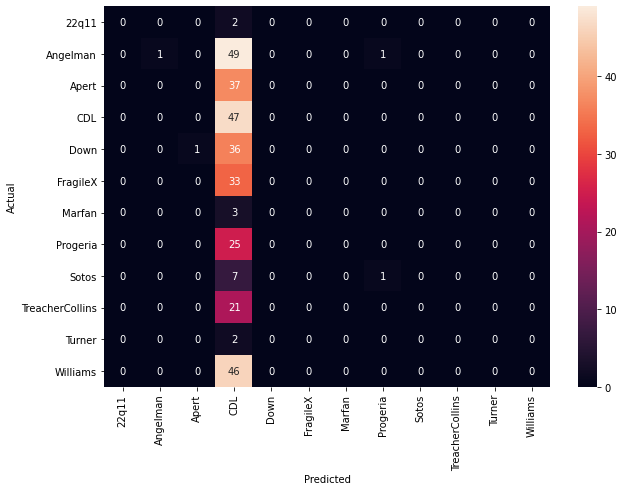

In [13]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## PCA SVM

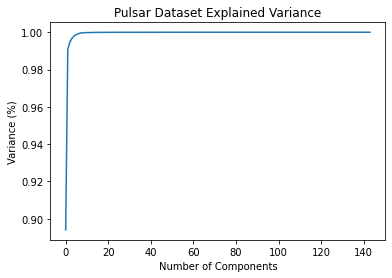

In [14]:
import numpy as np
from sklearn.decomposition import PCA 

pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5, max_iter=10000)
clf.fit(X_train_pca, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 1.73251122e-05 -1.23266918e-06 -1.59364199e-05  3.33014116e-05
   5.25273948e-06  1.48091827e-05  4.34566043e-05  4.45104174e-05
   6.13353094e-05 -2.81502470e-05]
 [ 2.71527363e-06  2.95963130e-05 -3.62071852e-05  1.53097828e-05
  -2.50358951e-05  7.76258909e-05 -3.52704173e-08 -4.71328021e-05
   2.47708950e-05  1.11766761e-04]
 [-1.93658688e-05 -8.64603320e-06 -3.81334583e-06 -2.37937029e-05
   4.02829561e-06 -6.54187153e-05  4.66395268e-05  7.82797975e-05
  -1.02727632e-05  2.00018049e-05]
 [ 2.18048612e-06  3.04139673e-05  1.22877217e-05  2.52813888e-05
  -3.55453829e-05 -5.21702199e-05 -3.10156935e-05  3.54016727e-05
   1.38281393e-04 -5.08300808e-05]
 [-1.33504753e-05  4.67489344e-07  1.27000272e-05  5.15658268e-05
  -8.08355611e-06 -1.07231547e-05 -6.52021684e-06  1.08930088e-04
  -1.42784539e-06  8.27742882e-05]
 [ 1.39241804e-05  4.89606962e-06  5.40804362e-06  3.93818355e-06
  -7.23965125e-06  2.52611604e-05  7.50574867e-06  7.40574038e-05
   8.71230999e-05 -9.16864030e-06

/home/curt/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train_pca)

accuracy = accuracy_score(y_train, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.15542521994134897


Text(69.0, 0.5, 'Actual')

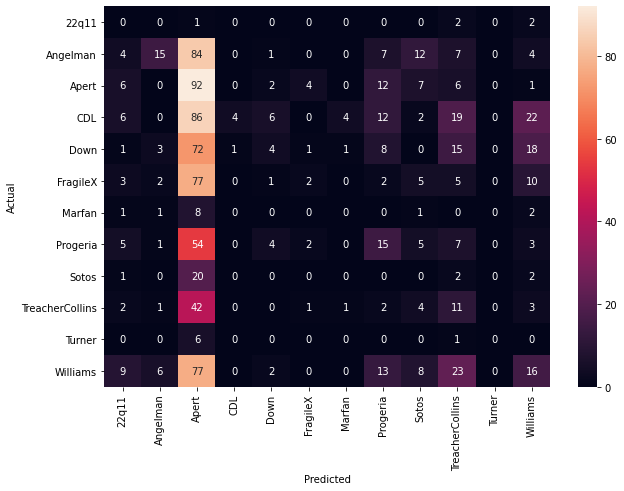

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.1346153846153846


Text(69.0, 0.5, 'Actual')

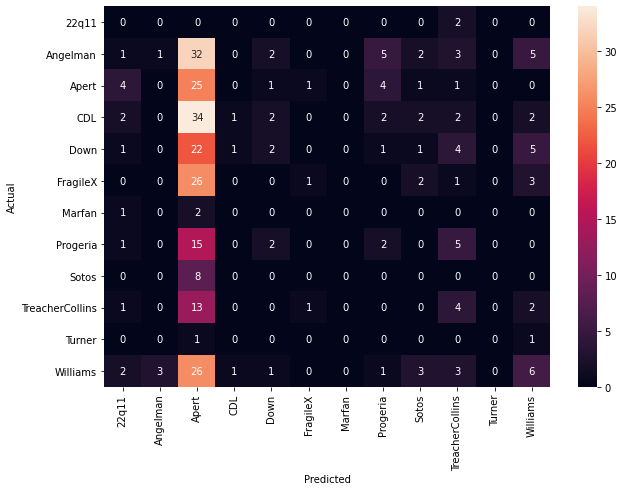

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## PCA Neural Network

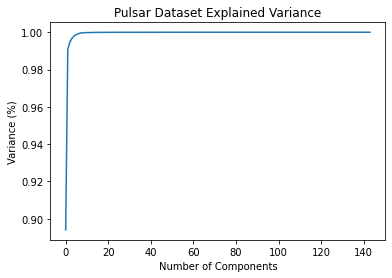

In [21]:
import numpy as np
from sklearn.decomposition import PCA 

pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, 50), max_iter=2000, verbose=True, n_iter_no_change=500)
clf.fit(X_train_pca, y_train)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf
Iteration 21, loss = inf
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Iteration 26, loss = inf
Iteration 27, loss = inf
Iteration 28, loss = inf
Iteration 29, loss = inf
Iteration 30, loss = inf
Iteration 31, loss = inf
Iteration 32, loss = inf
Iteration 33, loss = inf
Iteration 34, loss = inf
Iteration 35, loss = inf
Iteration 36, loss = inf
Iteration 37, loss = inf
Iteration 38, loss = inf
Iteration 39, loss = inf
Iteration 40, loss = inf
Iteration

Iteration 331, loss = inf
Iteration 332, loss = inf
Iteration 333, loss = inf
Iteration 334, loss = inf
Iteration 335, loss = inf
Iteration 336, loss = inf
Iteration 337, loss = inf
Iteration 338, loss = inf
Iteration 339, loss = inf
Iteration 340, loss = inf
Iteration 341, loss = inf
Iteration 342, loss = inf
Iteration 343, loss = inf
Iteration 344, loss = inf
Iteration 345, loss = inf
Iteration 346, loss = inf
Iteration 347, loss = inf
Iteration 348, loss = inf
Iteration 349, loss = inf
Iteration 350, loss = inf
Iteration 351, loss = inf
Iteration 352, loss = inf
Iteration 353, loss = inf
Iteration 354, loss = inf
Iteration 355, loss = inf
Iteration 356, loss = inf
Iteration 357, loss = inf
Iteration 358, loss = inf
Iteration 359, loss = inf
Iteration 360, loss = inf
Iteration 361, loss = inf
Iteration 362, loss = inf
Iteration 363, loss = inf
Iteration 364, loss = inf
Iteration 365, loss = inf
Iteration 366, loss = inf
Iteration 367, loss = inf
Iteration 368, loss = inf
Iteration 36

Iteration 631, loss = 25.53656753
Iteration 632, loss = 25.64298437
Iteration 633, loss = inf
Iteration 634, loss = 23.75474209
Iteration 635, loss = 25.12023681
Iteration 636, loss = 23.01548686
Iteration 637, loss = inf
Iteration 638, loss = inf
Iteration 639, loss = inf
Iteration 640, loss = inf
Iteration 641, loss = 23.24208281
Iteration 642, loss = 24.89234493
Iteration 643, loss = inf
Iteration 644, loss = inf
Iteration 645, loss = inf
Iteration 646, loss = inf
Iteration 647, loss = inf
Iteration 648, loss = 19.84449362
Iteration 649, loss = inf
Iteration 650, loss = inf
Iteration 651, loss = inf
Iteration 652, loss = inf
Iteration 653, loss = inf
Iteration 654, loss = inf
Iteration 655, loss = inf
Iteration 656, loss = 29.77295119
Iteration 657, loss = 32.32192491
Iteration 658, loss = 28.52306075
Iteration 659, loss = 29.84020234
Iteration 660, loss = 29.48211980
Iteration 661, loss = 23.20331863
Iteration 662, loss = 21.00867166
Iteration 663, loss = 20.20344791
Iteration 664,

Iteration 900, loss = 15.03548493
Iteration 901, loss = 16.30239458
Iteration 902, loss = 13.05405845
Iteration 903, loss = 16.70471052
Iteration 904, loss = 11.69072675
Iteration 905, loss = 9.94913284
Iteration 906, loss = 15.07164495
Iteration 907, loss = 20.91134975
Iteration 908, loss = 13.28356817
Iteration 909, loss = 10.16502573
Iteration 910, loss = 11.95279155
Iteration 911, loss = 9.96170843
Iteration 912, loss = 11.48309401
Iteration 913, loss = 11.63723825
Iteration 914, loss = 11.58140557
Iteration 915, loss = 17.84573481
Iteration 916, loss = 18.09192614
Iteration 917, loss = 15.46641001
Iteration 918, loss = 14.90217287
Iteration 919, loss = 17.33358716
Iteration 920, loss = 12.15052009
Iteration 921, loss = 12.17531145
Iteration 922, loss = 10.61411111
Iteration 923, loss = 10.27036418
Iteration 924, loss = 10.43253233
Iteration 925, loss = 9.78051740
Iteration 926, loss = 11.96797724
Iteration 927, loss = 13.60389961
Iteration 928, loss = 15.37327813
Iteration 929, lo

Iteration 1156, loss = 1.46520748
Iteration 1157, loss = 1.61683221
Iteration 1158, loss = 1.51798204
Iteration 1159, loss = 1.39109825
Iteration 1160, loss = 1.39230391
Iteration 1161, loss = 1.39653952
Iteration 1162, loss = 1.39000700
Iteration 1163, loss = 1.38000907
Iteration 1164, loss = 1.38246883
Iteration 1165, loss = 1.37875619
Iteration 1166, loss = 1.37291045
Iteration 1167, loss = 1.37123056
Iteration 1168, loss = 1.36946865
Iteration 1169, loss = 1.36769164
Iteration 1170, loss = 1.36603790
Iteration 1171, loss = 1.36411813
Iteration 1172, loss = 1.36239839
Iteration 1173, loss = 1.35969321
Iteration 1174, loss = 1.35778672
Iteration 1175, loss = 1.35467273
Iteration 1176, loss = 1.35263960
Iteration 1177, loss = 1.35157359
Iteration 1178, loss = 1.34940140
Iteration 1179, loss = 1.34797945
Iteration 1180, loss = 1.34686554
Iteration 1181, loss = 1.34570651
Iteration 1182, loss = 1.34494591
Iteration 1183, loss = 1.34292415
Iteration 1184, loss = 1.34234418
Iteration 1185

Iteration 1398, loss = 1.25825772
Iteration 1399, loss = 1.25817231
Iteration 1400, loss = 1.25821347
Iteration 1401, loss = 1.25807630
Iteration 1402, loss = 1.25809083
Iteration 1403, loss = 1.25793034
Iteration 1404, loss = 1.25784105
Iteration 1405, loss = 1.25779995
Iteration 1406, loss = 1.25776055
Iteration 1407, loss = 1.25772988
Iteration 1408, loss = 1.25768395
Iteration 1409, loss = 1.25940968
Iteration 1410, loss = 1.26888787
Iteration 1411, loss = 1.26597320
Iteration 1412, loss = 1.26943484
Iteration 1413, loss = 1.26123441
Iteration 1414, loss = 1.25965856
Iteration 1415, loss = 1.25864514
Iteration 1416, loss = 1.26048665
Iteration 1417, loss = 1.25966945
Iteration 1418, loss = 1.25880688
Iteration 1419, loss = 1.25978689
Iteration 1420, loss = 1.25917201
Iteration 1421, loss = 1.25828657
Iteration 1422, loss = 1.25792495
Iteration 1423, loss = 1.25757698
Iteration 1424, loss = 1.25730787
Iteration 1425, loss = 1.25808578
Iteration 1426, loss = 1.25878793
Iteration 1427

Iteration 1647, loss = 1.73956189
Iteration 1648, loss = 1.73790696
Iteration 1649, loss = 1.73721962
Iteration 1650, loss = 1.73656165
Iteration 1651, loss = 1.73307229
Iteration 1652, loss = 1.73414165
Iteration 1653, loss = 1.73339740
Iteration 1654, loss = 1.73120552
Iteration 1655, loss = 1.72945980
Iteration 1656, loss = 1.72844257
Iteration 1657, loss = 1.72657490
Iteration 1658, loss = 1.72556875
Iteration 1659, loss = 1.72491462
Iteration 1660, loss = 1.72481776
Iteration 1661, loss = 1.72609413
Iteration 1662, loss = 1.72445981
Iteration 1663, loss = 1.72262571
Iteration 1664, loss = 1.72147713
Iteration 1665, loss = 1.72213725
Iteration 1666, loss = 1.72171890
Iteration 1667, loss = 1.71976309
Iteration 1668, loss = 1.71970026
Iteration 1669, loss = 1.71889213
Iteration 1670, loss = 1.71881042
Iteration 1671, loss = 1.71929561
Iteration 1672, loss = 1.71804836
Iteration 1673, loss = 1.71657961
Iteration 1674, loss = 1.71576698
Iteration 1675, loss = 1.71567345
Iteration 1676

Iteration 1894, loss = 1.68821999
Iteration 1895, loss = 1.68895313
Iteration 1896, loss = 1.68993324
Iteration 1897, loss = 1.68844654
Iteration 1898, loss = 1.68884284
Iteration 1899, loss = 1.68690466
Iteration 1900, loss = 1.68657088
Iteration 1901, loss = 1.68472039
Iteration 1902, loss = 1.68316015
Iteration 1903, loss = 1.68233244
Iteration 1904, loss = 1.67890622
Iteration 1905, loss = 1.67895866
Iteration 1906, loss = 1.67737800
Iteration 1907, loss = 1.67815502
Iteration 1908, loss = 1.67845180
Iteration 1909, loss = 1.67563456
Iteration 1910, loss = 1.67552895
Iteration 1911, loss = 1.69508958
Iteration 1912, loss = 1.70483542
Iteration 1913, loss = 1.69110079
Iteration 1914, loss = 1.68184166
Iteration 1915, loss = 1.68016602
Iteration 1916, loss = 1.67997657
Iteration 1917, loss = 1.67828849
Iteration 1918, loss = 1.68044691
Iteration 1919, loss = 1.67695067
Iteration 1920, loss = 1.67707028
Iteration 1921, loss = 1.67411856
Iteration 1922, loss = 1.68214394
Iteration 1923

/home/curt/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=500, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_train_pca)

accuracy = accuracy_score(y_train, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_train,y_pred)

accuracy 0.3567937438905181


Text(69.0, 0.5, 'Actual')

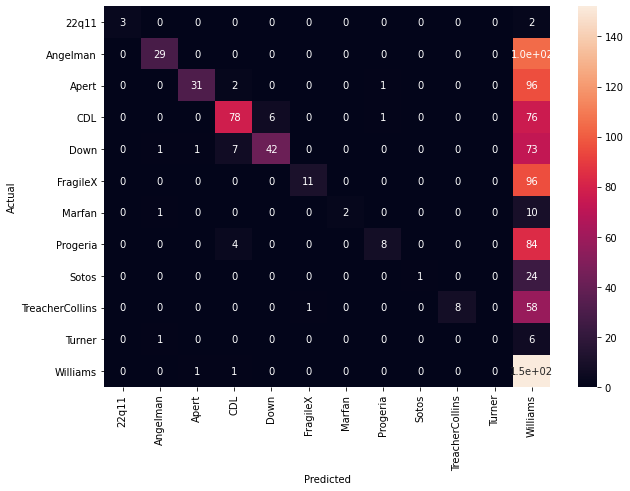

In [25]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


y_pred = clf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy',accuracy)

conf = confusion_matrix(y_test,y_pred)

accuracy 0.18269230769230768


Text(69.0, 0.5, 'Actual')

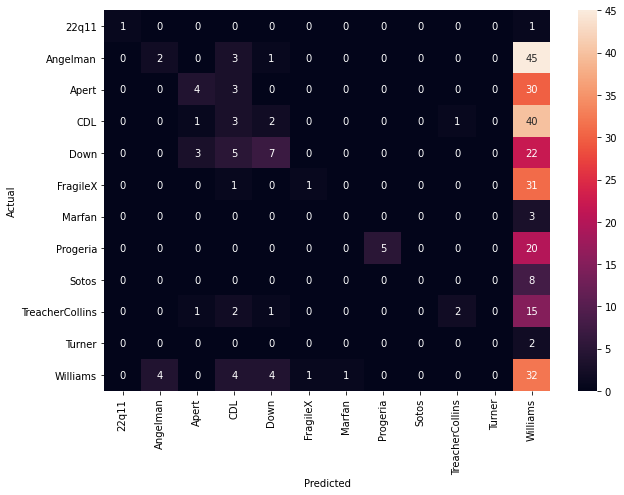

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, index = [i for i in LABELS],
                  columns = [i for i in LABELS])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')